# Data Cleaning and Data Visualization for **Task B (Binary Faux-Target Detection)**

## Libraries

In [13]:
!pip install unidecode

In [14]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from unidecode import unidecode
from collections import Counter

## 1. Load the dataset

In [15]:
file_path = '/content/Train_Task_B_Updated.xlsx'
data_task_a = pd.read_excel(file_path)
data_task_a.head()

,Id,Tweet,Hate,Target,Severity
0,5723,@sudhirchaudhary Abhi tak 2000 ke note me mujh...,0,NaN,NaN
1,2338,@Gulamane_raza @MustakimRazvi Abe katiye tumse...,1,O,H
2,1579,@RajatSharmaLive Ye sab sazish hai....bina sam...,1,O,M
3,6524,abe jao tum to dasko pahle hi fash gye the jab...,1,I,L
4,7618,Ab ye afbah kaun faila Raha hai ki Shahhen bag...,0,NaN,NaN


## 2. Data cleaning function

In [16]:
def clean_text(text):
    if not isinstance(text, str):
        return ''
    text = str(text)
    text = re.sub(r'<br>', ' ', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+|#+', '', text)
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)

    return text.strip()


## 3. Apply Cleaning and save cleaned data to csv

In [17]:
# Apply cleaning
data_task_a['Tweet'] = data_task_a['Tweet'].apply(clean_text)
data_task_a = data_task_a.dropna(subset=['Tweet'])

print(data_task_a.head())

# Save cleaned data to CSV
# cleaned_file_path = ''
# data_task_a.to_csv(cleaned_file_path, index=False)

     Id                                              Tweet  Hate Target  \
0  5723  Abhi tak 2000 ke note me mujhe GPS nano chip n...     0    NaN   
1  2338  Abe katiye tumse kuch huaa toh jata nahi bas b...     1      O   
2  1579  Ye sab sazish haibina saman ke koi kaise apne ...     1      O   
3  6524  abe jao tum to dasko pahle hi fash gye the jab...     1      I   
4  7618  Ab ye afbah kaun faila Raha hai ki Shahhen bag...     0    NaN   

  Severity  
0      NaN  
1        H  
2        M  
3        L  
4      NaN  


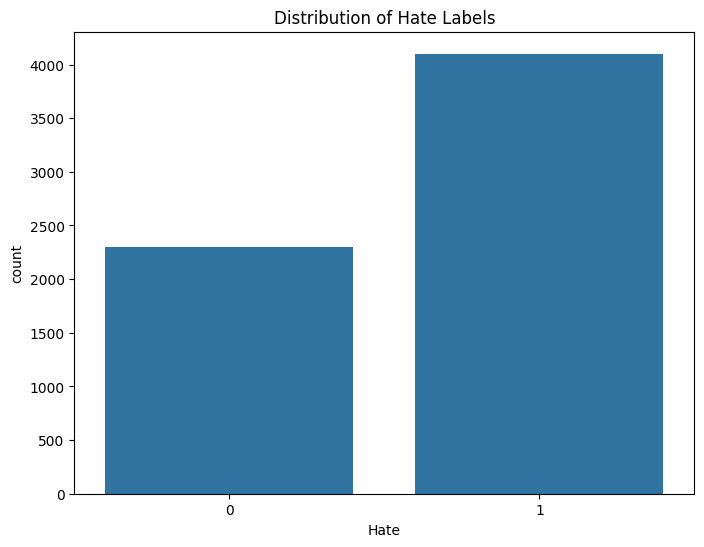

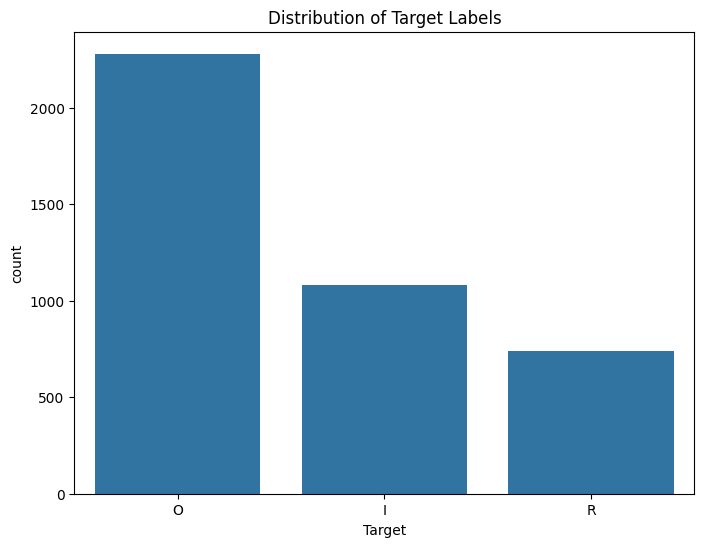

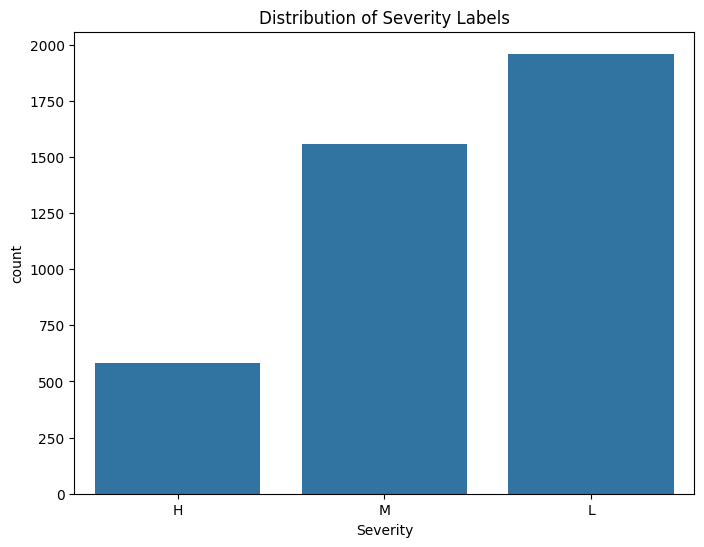

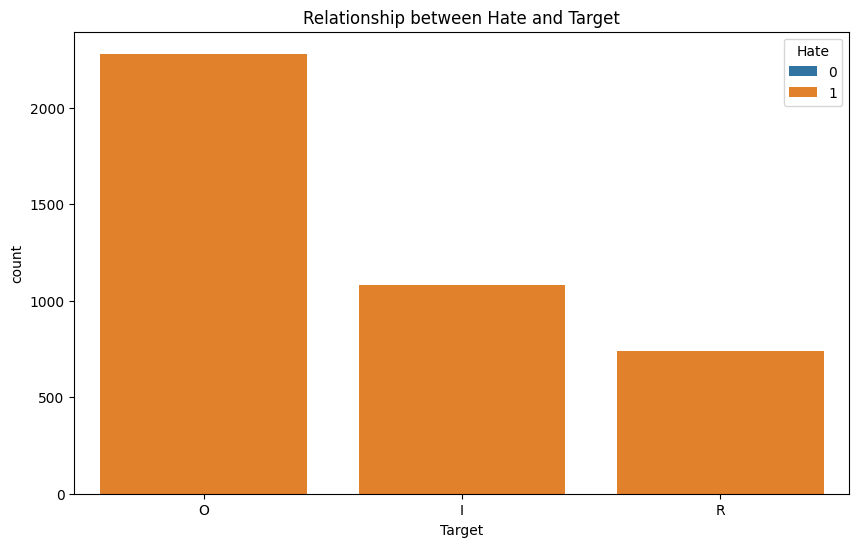

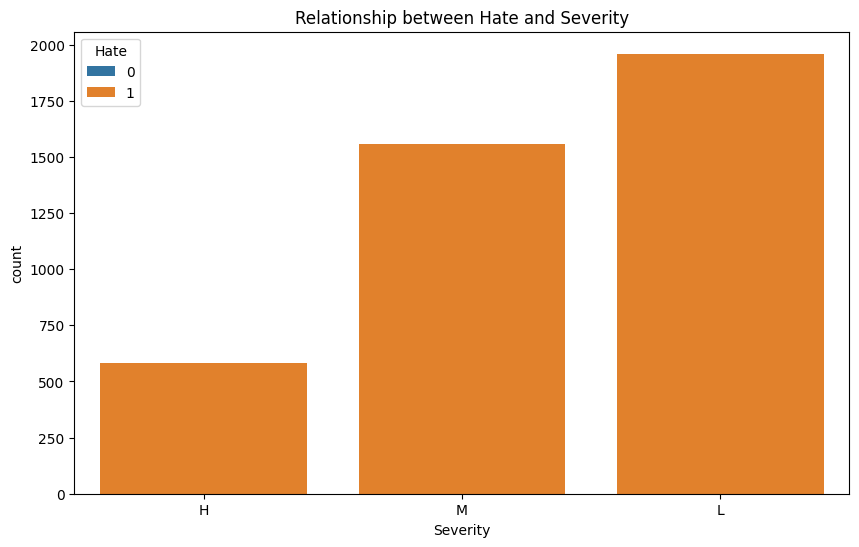

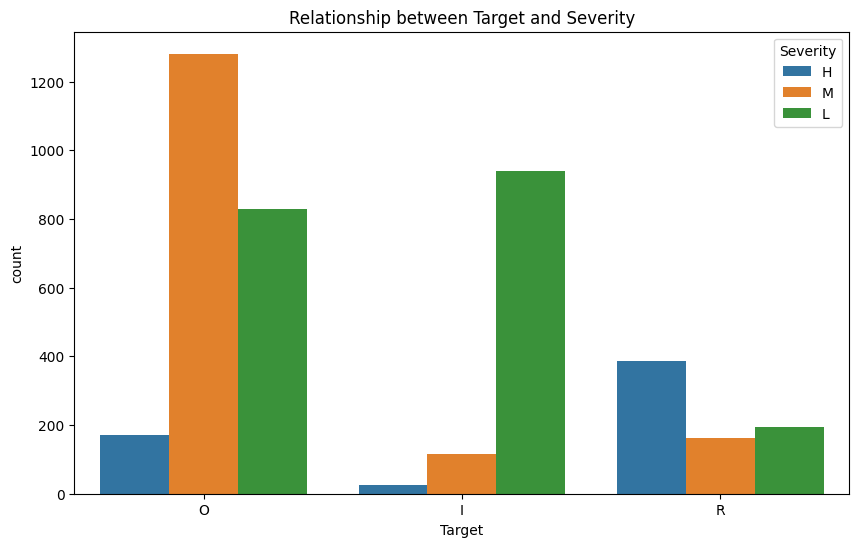

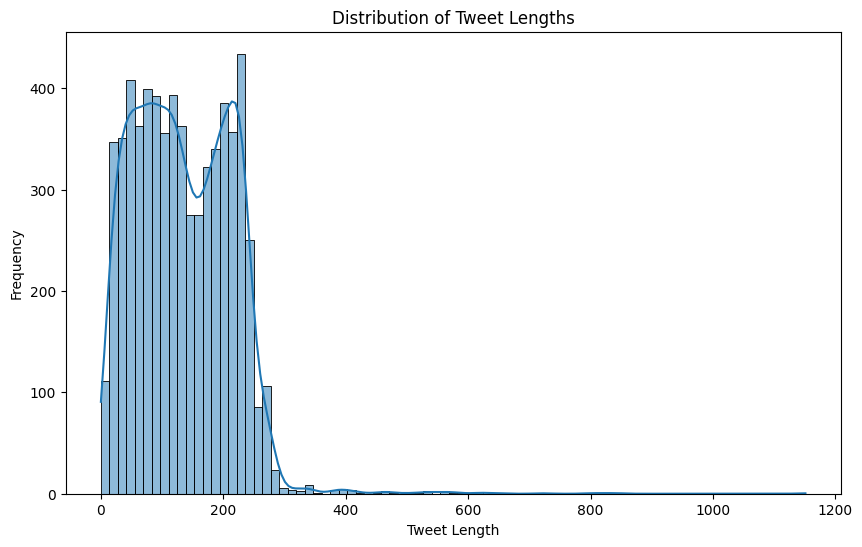

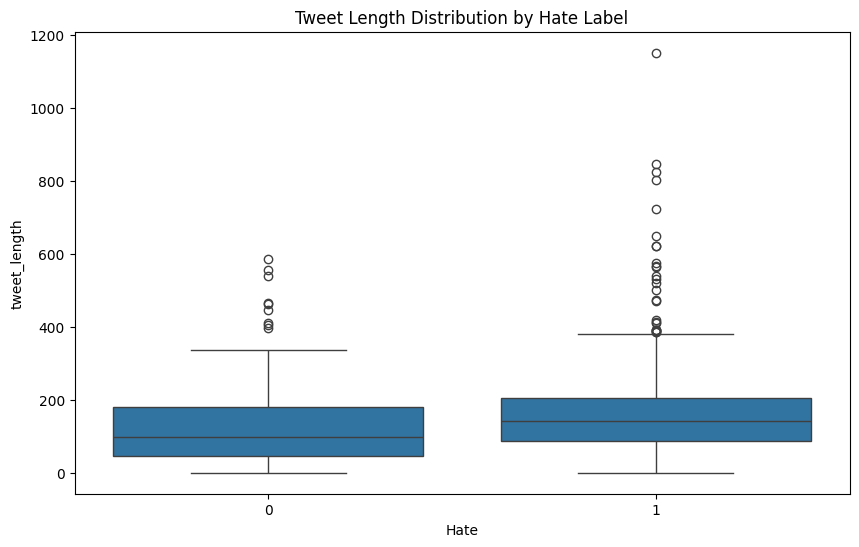

In [22]:
# prompt: these dataset contains 5 columns Id, Tweet, Hate, Target and Severity. Hate contains 2 labels 0 or 1. Target contains 4 labels O, I,R and NaN. Severity contains 4 labels H,M,L and NaN. Do data visulization on dataset data_task_a. It should include all the distribution of the label and other visulization for this kind of data.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data_task_a' DataFrame is already loaded and cleaned as in the previous code.

# 1. Distribution of 'Hate' labels
plt.figure(figsize=(8, 6))
sns.countplot(x='Hate', data=data_task_a)
plt.title('Distribution of Hate Labels')
plt.show()

# 2. Distribution of 'Target' labels
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=data_task_a)
plt.title('Distribution of Target Labels')
plt.show()

# 3. Distribution of 'Severity' labels
plt.figure(figsize=(8, 6))
sns.countplot(x='Severity', data=data_task_a)
plt.title('Distribution of Severity Labels')
plt.show()


# 4. Relationship between 'Hate' and 'Target'
plt.figure(figsize=(10, 6))
sns.countplot(x='Target', hue='Hate', data=data_task_a)
plt.title('Relationship between Hate and Target')
plt.show()

# 5. Relationship between 'Hate' and 'Severity'
plt.figure(figsize=(10, 6))
sns.countplot(x='Severity', hue='Hate', data=data_task_a)
plt.title('Relationship between Hate and Severity')
plt.show()

# 6.  Relationship between 'Target' and 'Severity'
plt.figure(figsize=(10, 6))
sns.countplot(x='Target', hue='Severity', data=data_task_a)
plt.title('Relationship between Target and Severity')
plt.show()

# 7. Tweet length distribution
data_task_a['tweet_length'] = data_task_a['Tweet'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data_task_a['tweet_length'], kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

# 8. Boxplot of Tweet Length by Hate Label
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hate', y='tweet_length', data=data_task_a)
plt.title('Tweet Length Distribution by Hate Label')
plt.show()

# Additional visualizations can include:
# - Word clouds for tweets with different hate labels
# - Analysis of the most frequent words for different targets and severities
# - Bigram or trigram analysis to explore common phrases.



In [24]:
# prompt:  Don't need visulization only give me analysis on the data.

import pandas as pd
import re

# Load the dataset
file_path = '/content/Train_Task_B_Updated.xlsx'
data_task_a = pd.read_excel(file_path)

# Data cleaning function (same as before)
def clean_text(text):
    if not isinstance(text, str):
        return ''
    text = str(text)
    text = re.sub(r'<br>', ' ', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+|#+', '', text)
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# Apply cleaning
data_task_a['Tweet'] = data_task_a['Tweet'].apply(clean_text)
data_task_a = data_task_a.dropna(subset=['Tweet'])

# Descriptive statistics for numerical features (if any)
print(data_task_a.describe())

# Value counts for categorical features
print("\nDistribution of Hate Labels:\n", data_task_a['Hate'].value_counts())
print("\nDistribution of Target Labels:\n", data_task_a['Target'].value_counts())
print("\nDistribution of Severity Labels:\n", data_task_a['Severity'].value_counts())

# Cross-tabulations for relationships between categorical features
print("\nRelationship between Hate and Target:\n", pd.crosstab(data_task_a['Hate'], data_task_a['Target']))
print("\nRelationship between Hate and Severity:\n", pd.crosstab(data_task_a['Hate'], data_task_a['Severity']))
print("\nRelationship between Target and Severity:\n", pd.crosstab(data_task_a['Target'], data_task_a['Severity']))


# Tweet length analysis
data_task_a['tweet_length'] = data_task_a['Tweet'].apply(len)
print("\nTweet Length Statistics:\n", data_task_a['tweet_length'].describe())
print("\nAverage tweet length by Hate label:\n", data_task_a.groupby('Hate')['tweet_length'].mean())

                Id         Hate
count  6396.000000  6396.000000
mean   4010.616948     0.641182
std    2303.636173     0.479691
min       1.000000     0.000000
25%    2025.750000     0.000000
50%    4016.500000     1.000000
75%    6006.250000     1.000000
max    7996.000000     1.000000

Distribution of Hate Labels:
 Hate
1    4101
0    2295
Name: count, dtype: int64

Distribution of Target Labels:
 Target
O    2279
I    1081
R     741
Name: count, dtype: int64

Distribution of Severity Labels:
 Severity
L    1960
M    1559
H     582
Name: count, dtype: int64

Relationship between Hate and Target:
 Target     I     O    R
Hate                   
1       1081  2279  741

Relationship between Hate and Severity:
 Severity    H     L     M
Hate                     
1         582  1960  1559

Relationship between Target and Severity:
 Severity    H    L     M
Target                  
I          26  939   116
O         170  828  1281
R         386  193   162

Tweet Length Statistics:
 count 